# How WNet_cGAN works ?

Image-to-Image translation is defined as the task of translating from one possible representation of the scene to another, given the amount of training data from two sets of scenes.

In this guide, we will focus on `WNet_cGAN` [[4](https://arxiv.org/abs/1904.09935)], which blends spectral and height information in one network. This model was developed to refine or extract level of details 2 (LoD2) Digital Surface Model (DSM) for buildings from previously available DSM using an additional raster, such as panchromatic (PAN) imagery. This approach can help in the extraction of refined building structures with higher levels of detail from a raw DSM and high resolution imagery for urban cities.

To follow the guide below, we recommend you read this guide about [How Pix2Pix works?](https://developers.arcgis.com/python/guide/how-pix2pix-works/).

## WNet_cGAN

`WNet_cGAN` is a type of conditional GAN (Generative Adversarial Networks). cGANs (Conditional GANS) are trained on paired sets of images or scenes from two domains to be used for translation. `WNet_cGAN` was first introduced in paper [[3](https://arxiv.org/abs/1903.03519)], and was originally used for the refinement of stereo DSM using panchromatic imagery to generate LOD2 building DSMs. Further improvements to the model were made in another paper [[4](https://arxiv.org/abs/1904.09935)], by changing the generator architecture and introducing a normal vector loss in, addition to the previous losses.

The architecture of `WNet_cGAN` consists of a Generator (G) and a Discriminator (D). The Generator (G) consists of two encoders and a common decoder, which admits two inputs, stacked with a Discriminator, which is a patch-GAN type architecture that discriminates between Real and Fake labels.

## Model architecture

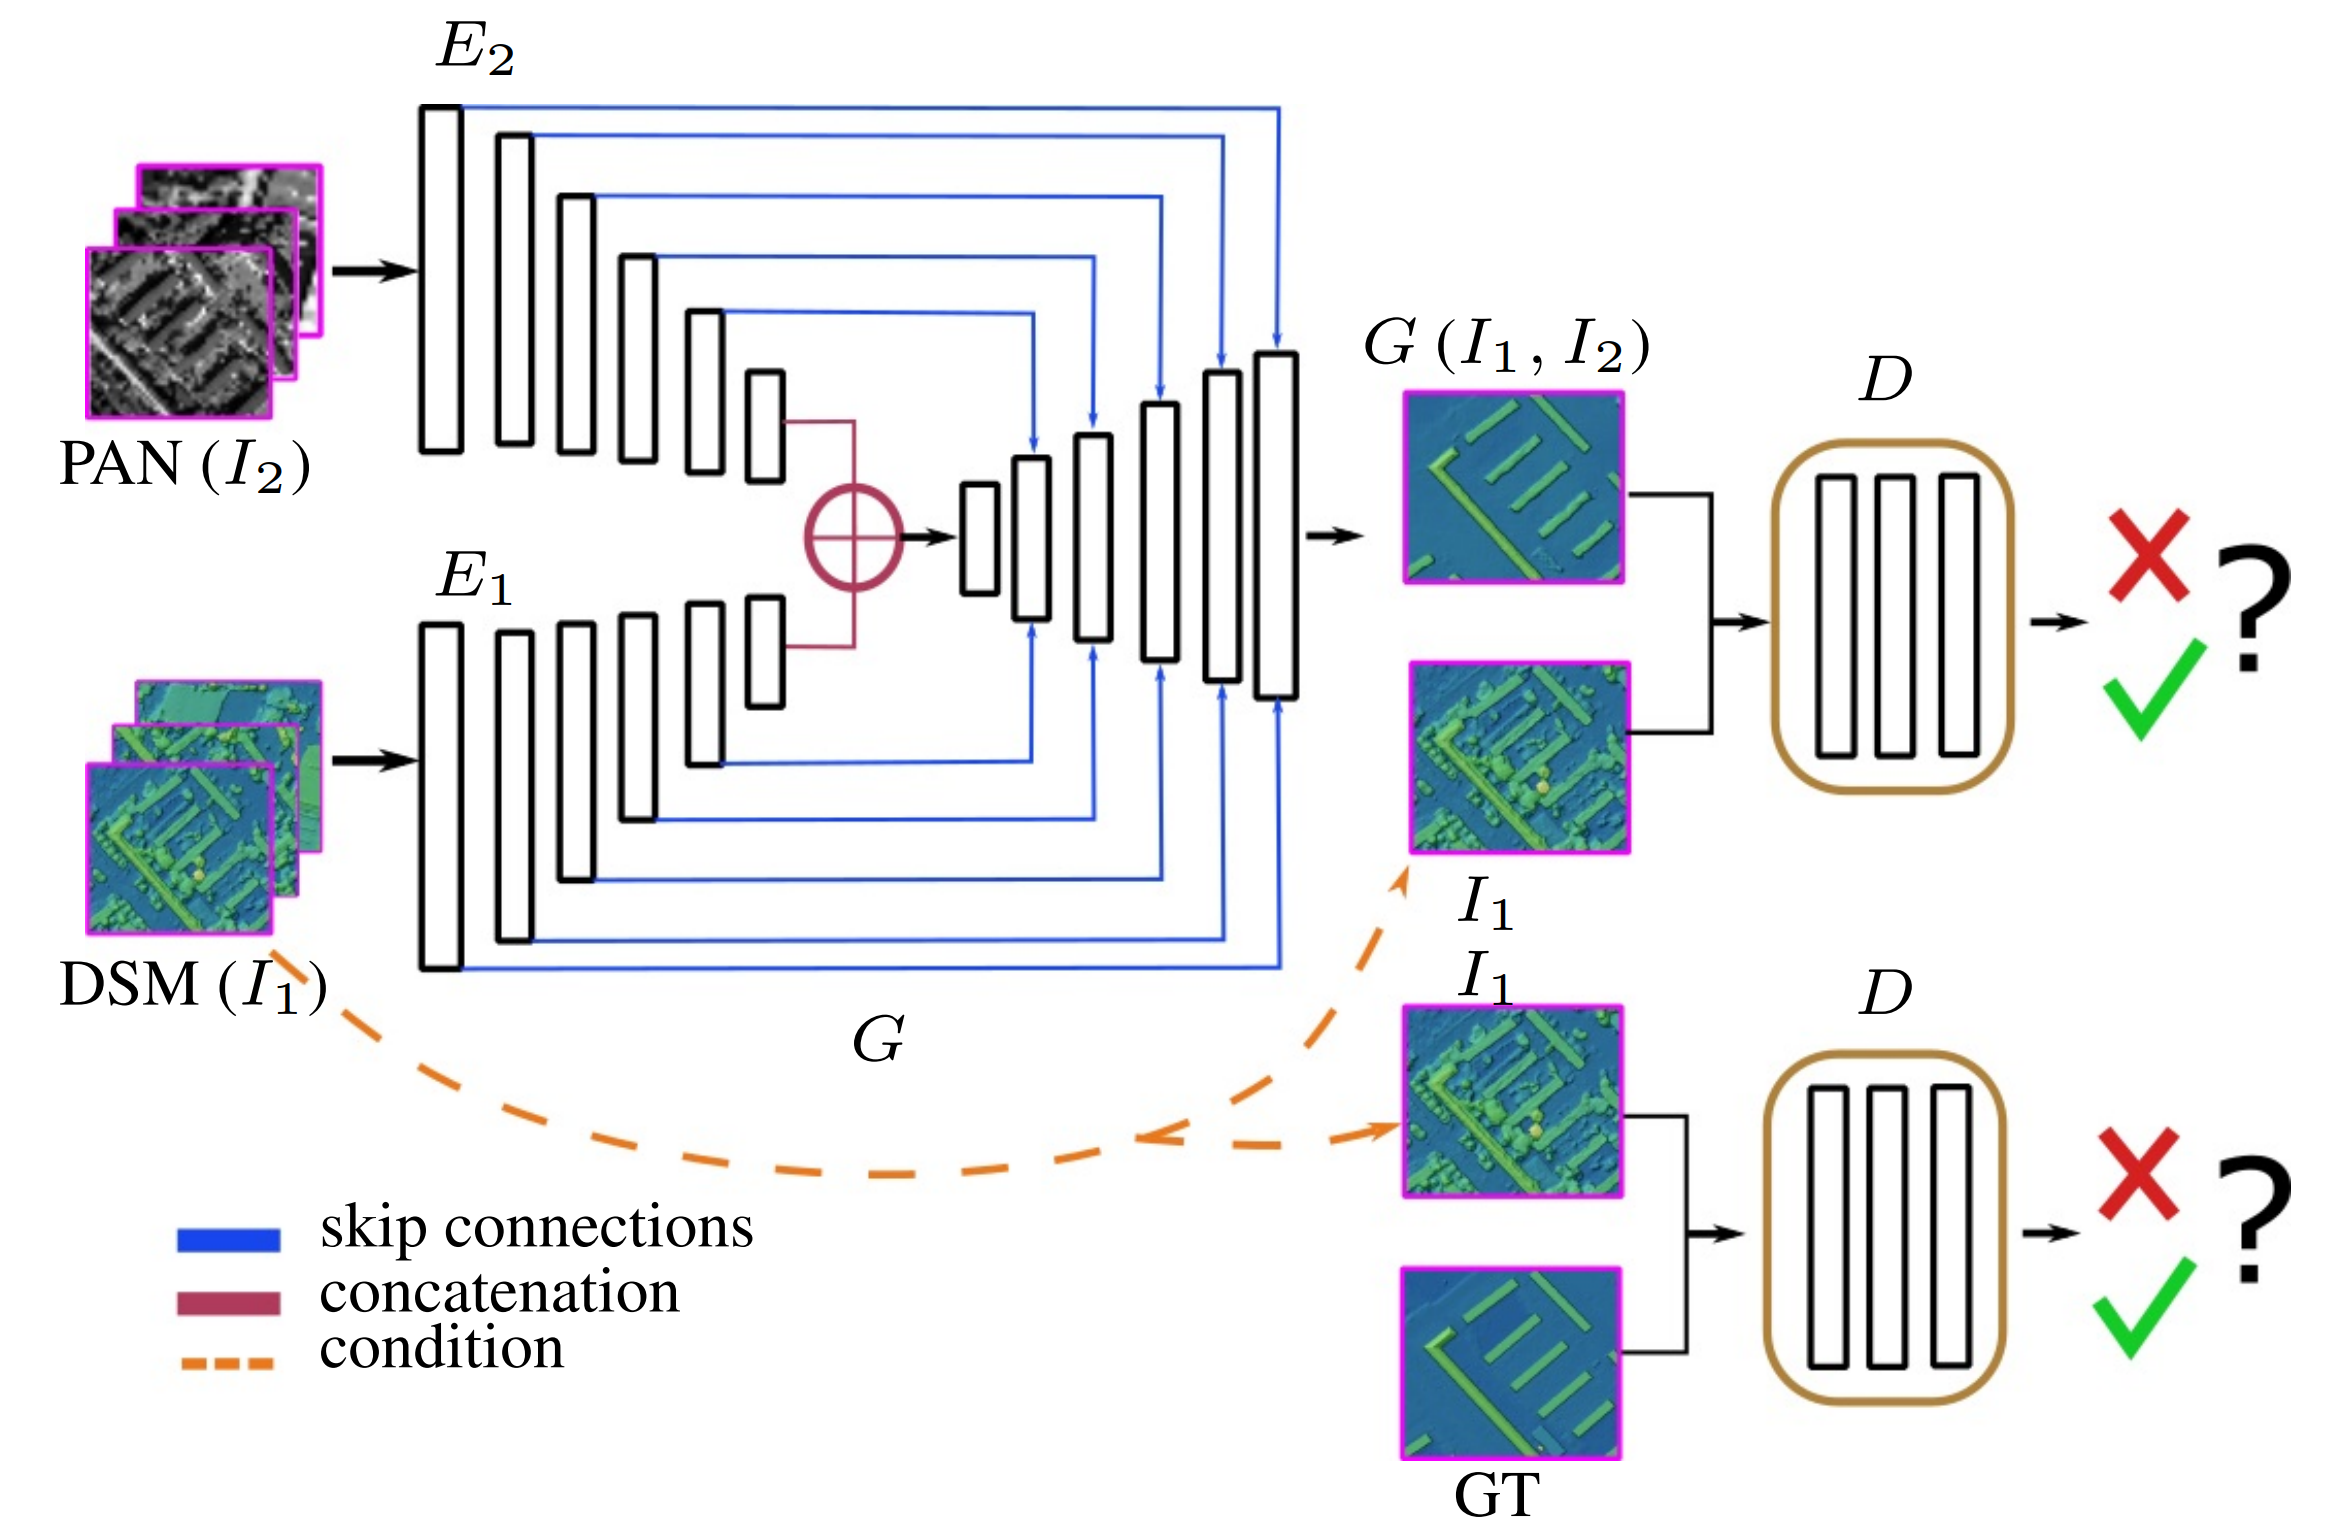

<center> Figure 1. WNet_cGAN model architecture </center> 

### Generator

The generator G of the `WNet_cGAN` network, as shown in figure 1, consists of two encoders, E1 and E2, concatenated at the top layer, and a common decoder, which integrates information from two different modalities and generates refined DSM, or in the case of the dataset used in the paper, LoD2-like DSM with refined building shapes [[4](https://arxiv.org/abs/1904.09935)]. The generator G is constructed based on a U-form network. As a result, it has 14 skip connections from both the streams or inputs to the encoders [[4](https://arxiv.org/abs/1904.09935)]. In particular, the encoder and decoder consist of 8 convolutional layers each, followed by a leaky rectified linear unit (LReLU) activation function and batch normalization (BN), in the case of the encoder, and a rectified linear unit (ReLU) activation function and BN, in the case of the decoder. On top of the generator network G, the tanh activation function [[4](https://arxiv.org/abs/1904.09935)] is also implemented..

The generator loss is a combination of the sigmoid cross-entropy loss between generated images and an array of ones (gan adversarial loss), L1 loss, also called MAE(mean absolute error), and Normal vector loss, which measures the angle between the set of surface normals N of an estimated DSM and the set of surface normals N of the target LoD2-DSM [[4](https://arxiv.org/abs/1904.09935)].

### Discriminator

The discriminator network D, as shown in figure 1, is a binary classification network constructed with 5 convolutional layers, followed by an LReLU activation function and a BN layer. It has a sigmoid activation function at the top layer to output the likelihood that the input image belongs either to class 1 (“real”) or class 0 (“generated”) [[4](https://arxiv.org/abs/1904.09935)].

As described in the paper, the generator and the discriminator are sequentially trained. The losses calculated between pairs (input DSM and Generated Label) and with the pairs (input DSM and Ground truth Label) are shuffled while training the discriminator to increase stability [[4](https://arxiv.org/abs/1904.09935)].

For a detailed description of the architectures and hyper-parameters, refer to this [paper](https://arxiv.org/abs/1904.09935).

## Implementation in  `arcgis.learn`

The data folder should currently have two folders named `train_A_C` and `train_B`. Initially, we have to export the image chips in the `Export tiles` metadata format using the `Export Training data for deep learning` tool available in ArcGIS Pro tool by providing two domains of imagery in `Input Raster` and `Additional Input Raster`. 

This is done twice, First, with DSM as the input raster, labels or LOD2 DSM as the additional raster, and the output folder name `train_A_C`. Second, with only a panchromatic raster or other multispectral raster as the input raster and output folder name as `train_B`. The rasters used for data export should have a similar cell size. Then, the path is provided to the `prepare_data` function in `arcgis.learn` to create a databunch.

`data = arcgis.learn.prepare_data(path=r"path/to/exported/data")`

Next we initialize the `WNet_cGAN` model object. We can do that as shown below:

`model = arcgis.learn.WNet_cGAN(data=data)`

Here, `data` is a databunch, object returned from `prepare_data` function.

Than we can continue with basic `arcgis.learn` workflow.

For more information about the API & model applications, refer to the [API reference](https://developers.arcgis.com/python/api-reference/arcgis.learn.toc.html).

## Summary 

In this guide, we discussed the various details of the `WNet_cGAN` model and how we can initialize the model in `arcgis.learn`

## References

1. Isola, Phillip, Jun-Yan Zhu, Tinghui Zhou, and Alexei A. Efros. "Image-to-image translation with conditional adversarial networks." In Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 1125-1134. 2017.
2. CS231n: Convolutional Neural Networks for Visual Recognition. http://cs231n.stanford.edu/
3. Bittner, K., Körner, M. and Reinartz, P., 2019, July. DSM building shape refinement from combined remote sensing images based on WNET-CGANS. In IGARSS 2019-2019 IEEE International Geoscience and Remote Sensing Symposium (pp. 783-786). IEEE.
4. Bittner, Ksenia, Peter Reinartz, and Marco Korner. "Late or earlier information fusion from depth and spectral data? large-scale digital surface model refinement by hybrid-cgan." In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition Workshops, pp. 0-0. 2019.
5. Goodfellow, Ian, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, and Yoshua Bengio. "Generative adversarial nets." In Advances in neural information processing systems, pp. 2672-2680. 2014.